In [1]:
import pandas as pd

In [91]:
df=pd.read_csv('train.csv')
# df2=pd.read_csv('test.csv')
# df=pd.concat([df1,df2])

In [93]:
df.head()
df['Fare']=df['Fare'].astype(int)
# df[df['Fare']==512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512,B101,C


In [94]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

**Numerical**:PassengerId,Age,Fare  
**Catgegorical**:Survived,Pclass,Sibsp,Parch,Embarked  
**Mixed**:Name,Ticket,Cabin

Age Analysis:  
-177 missing varlues  
-near to binomial distribution  
-outliers are present  



In [95]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

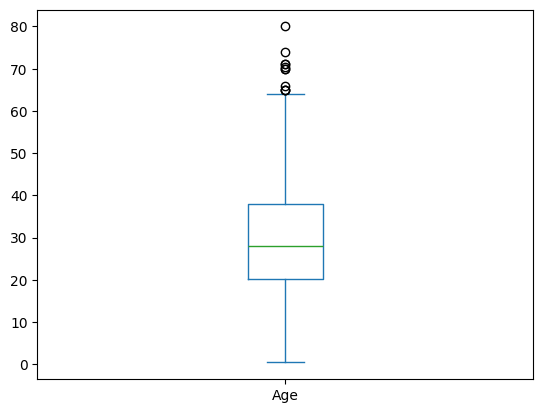

In [96]:
df['Age'].plot(kind='box')

<Axes: ylabel='Frequency'>

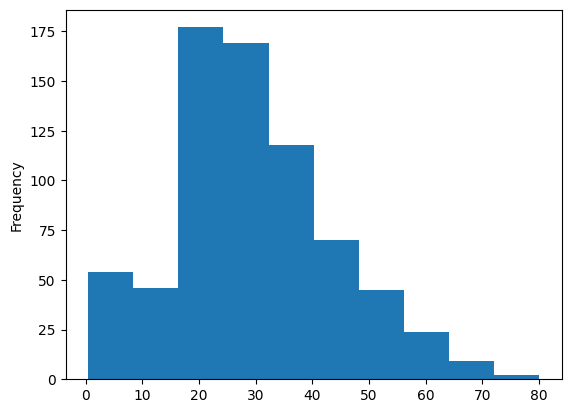

In [97]:
df['Age'].plot(kind='hist')

In [98]:

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers in 'Age'
outliers_fare = find_outliers_iqr(df, 'Age')
print("Outliers in Age:\n", outliers_fare[['Age']])


Outliers in Age:
       Age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0


<Axes: ylabel='Density'>

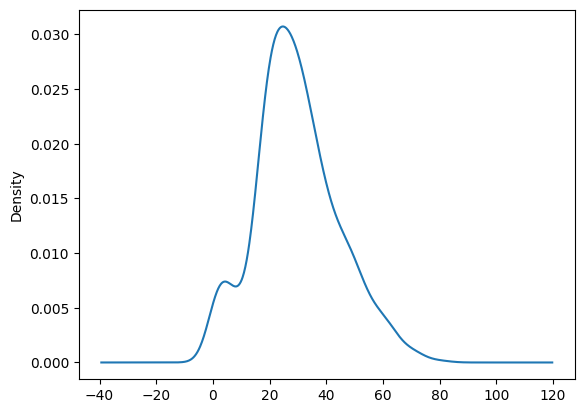

In [99]:
df['Age'].plot(kind='kde')

In [100]:
df['Age'].isnull().sum()


np.int64(177)

In [101]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 100],
                              labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
print(df['Age_Group'].value_counts())


Age_Group
Adult          425
Middle-aged    128
Teen            70
Child           69
Senior          22
Name: count, dtype: int64


**Fare Analysis:**  
*13 percent Outliers*  
*Highly positively skwed*



In [102]:
df['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

<Axes: >

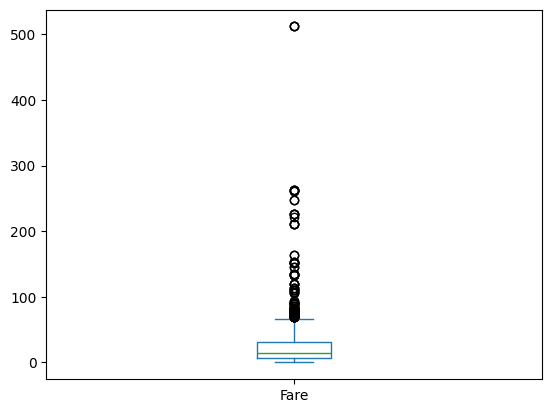

In [103]:
df['Fare'].plot(kind='box')

In [104]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers in 'Age'
outliers_fare = find_outliers_iqr(df, 'Fare')
print("Outliers in Fare:\n", outliers_fare[['Fare']])

Outliers in Fare:
      Fare
1      71
27    263
31    146
34     82
52     76
..    ...
846    69
849    89
856   164
863    69
879    83

[114 rows x 1 columns]


<Axes: ylabel='Frequency'>

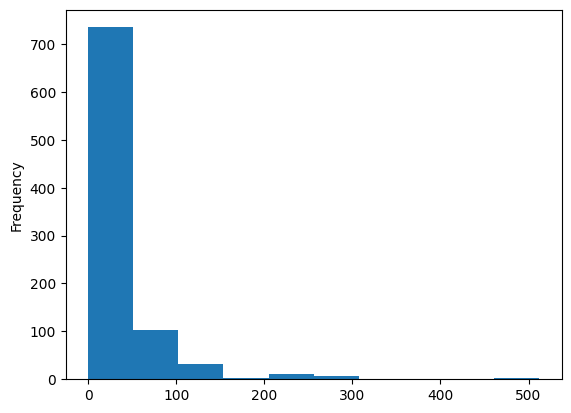

In [105]:
df['Fare'].plot(kind='hist')

In [106]:
len(df['Fare'])

891

In [107]:
(116/881)*100

13.166855845629966

<Axes: ylabel='Density'>

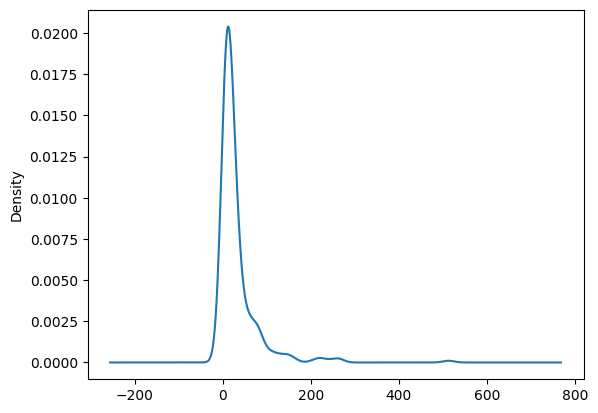

In [108]:
df['Fare'].plot(kind='kde')

In [109]:
df['Fare'].skew()

np.float64(4.786429747056348)

In [110]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0, 10, 50, 100, 600],
                                  labels=['Low', 'Medium', 'High', 'Very High'])
print(df['Fare_Category'].value_counts())


Fare_Category
Medium       368
Low          349
High         106
Very High     53
Name: count, dtype: int64


**Pclass Anlysis**:  
*Most Pepople are travelling in third class then first Class then second class*  
*Why there are less peoples in 2 class ?*  


In [111]:
df['Pclass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [112]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

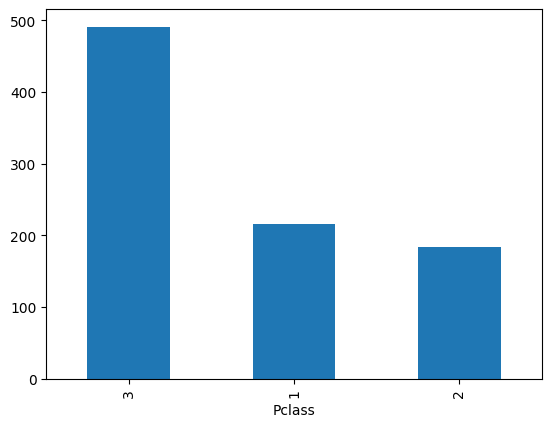

In [113]:
df['Pclass'].value_counts().plot(kind='bar')

In [114]:
df['Pclass'].isnull().sum()

np.int64(0)

<Axes: ylabel='count'>

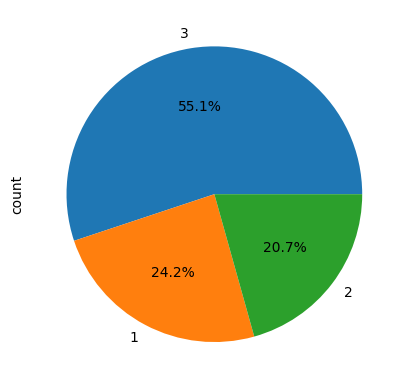

In [115]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

# **Embarked Analysis**:  
*S:southampton*   
C:Cherbourg  
Q:Queenstown  
*Titanic Started from s then c then q*  
*Most people started from S then C then Q*

In [116]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

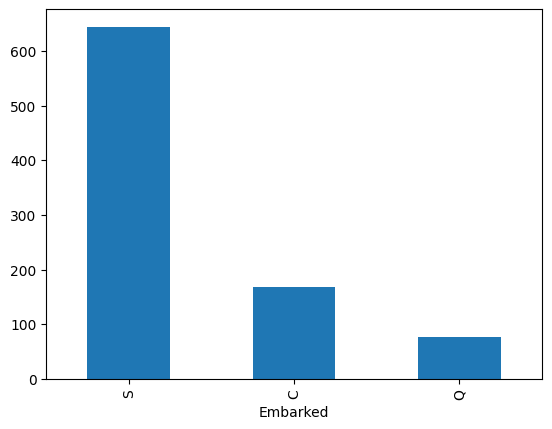

In [117]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

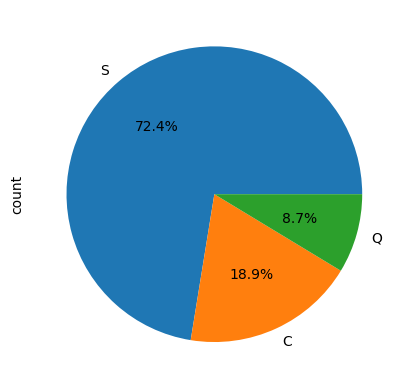

In [118]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

# SibSp Analysis
*Most of them Travelling where single*

In [119]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

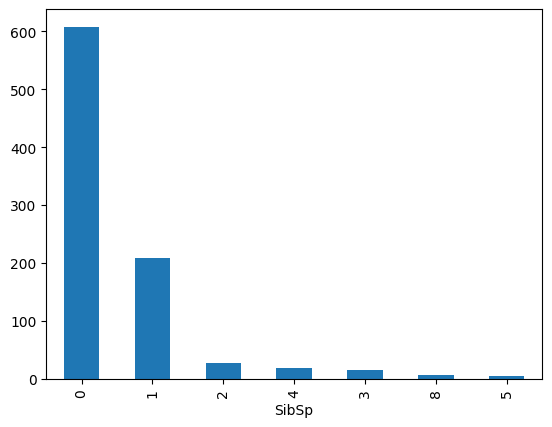

In [120]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

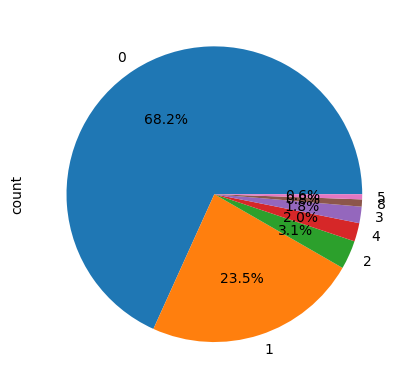

In [121]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

# **Parch Analysis**


In [122]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

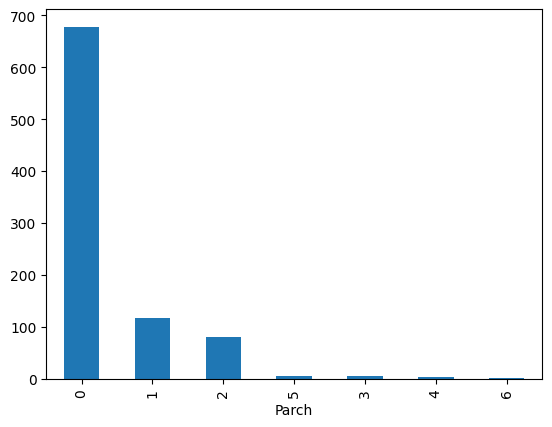

In [123]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

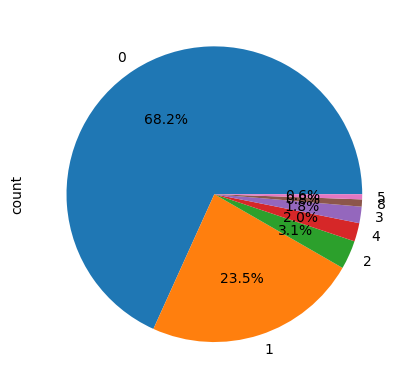

In [124]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [125]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,Adult,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,Adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,Adult,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,Adult,Low


# **Bivariate  Analysis**
**Survied VS Age_Group**:  
-the higesht survived are from Adult and then Middle-age  
-the highest died are from also died and then from middle-age  
-the Highest Survival rate  is from child category the Teen  
-the loest Survival rate is from Sennior Middle Age  

*Findings*:
-The highest Priority to rescues wa given to childrens

In [126]:
df['Age_Group'].isnull().sum()

np.int64(177)

In [127]:
#From survied how much percent belong to particular age group
#from died 6% belong to child grpup
pd.crosstab(df['Survived'],df['Age_Group'],normalize='index')*100

Age_Group,Child,Teen,Adult,Middle-aged,Senior
Survived,,,,,
0,6.839623,9.433962,61.320755,18.396226,4.009434
1,13.793103,10.344828,56.896552,17.241379,1.724138


In [128]:
#from particular age_group how much percent survide and how much died

pd.crosstab(df['Age_Group'], df['Survived'], normalize='index') * 100


Survived,0,1
Age_Group,,
Child,42.028986,57.971014
Teen,57.142857,42.857143
Adult,61.176471,38.823529
Middle-aged,60.937500,39.062500
Senior,77.272727,22.727273


# Survived VS Fare
-The Highest Survival rate were the people with very high fare and high Category  
-The Lowest Survival rate were with low fare

*Findings*:
-The Priority was given to High class Peoples

In [129]:
df['Fare_Category'].value_counts()

Fare_Category
Medium       368
Low          349
High         106
Very High     53
Name: count, dtype: int64

In [130]:
pd.crosstab(df['Fare_Category'],df['Survived'],normalize='index')*100

Survived,0,1
Fare_Category,,
Low,78.510029,21.489971
Medium,57.336957,42.663043
High,33.962264,66.037736
Very High,26.415094,73.584906


# Survived Vs Pclass
-The Highest Survival rate is for people in Pclass 1  
-Lowest Survival rate is for people in Pclass 3

In [131]:
pd.crosstab(df['Pclass'],df['Survived'],normalize='index')*100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [132]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Group',
       'Fare_Category'],
      dtype='object')

# Survived VS Sex
-High Survival rate is of males than females

In [133]:
pd.crosstab(df['Sex'],df['Survived'],normalize='index')*100

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


# Survived Vs Sibsp

People with 0 SibSp (alone travelers) had a 34.5% survival rate

Majority (65.5%) died.
Traveling alone reduced survival chances, possibly due to a lack of support.  
2 **People with 1 SibSp had the highest survival rate (53.6%)

More than half survived, likely because they had a companion to help them.  
3 Survival rate decreases as SibSp increases beyond 2

For 3+ SibSp, survival rate drops drastically:  
SibSp = 3: Only 25% survived  
SibSp = 4: Only 16.7% survived  
SibSp = 5 and 8: 0% survival rate  
Possible reasons:  
Larger families may have struggled to escape together.  
Limited availability of lifeboat spots for large groups.

In [134]:
pd.crosstab(df['SibSp'],df['Survived'],normalize='index')*100

Survived,0,1
SibSp,,
0,65.460526,34.539474
1,46.411483,53.588517
2,53.571429,46.428571
3,75.000000,25.000000
4,83.333333,16.666667
5,100.000000,0.000000
8,100.000000,0.000000


In [135]:
pd.crosstab(df['Parch'],df['Survived'],normalize='index')*100

Survived,0,1
Parch,,
0,65.634218,34.365782
1,44.915254,55.084746
2,50.000000,50.000000
3,40.000000,60.000000
4,100.000000,0.000000
5,80.000000,20.000000
6,100.000000,0.000000


In [136]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,Adult,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,Adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,Adult,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,Adult,Low


In [137]:
# arr=df['Cabin']
# df['Cabin'].sample(20)

In [138]:
import numpy as np
df['Cabin_Letter'] = df['Cabin'].astype(str).str[0].replace('n', np.nan)
df['Cabin_Letter'].value_counts()

Cabin_Letter
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [139]:
pd.crosstab(df['Cabin_Letter'],df['Survived'],normalize='index')*100

Survived,0,1
Cabin_Letter,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
T,100.000000,0.000000


In [140]:
df['Family_name']=df['Name'].astype(str).str.split(',').str[0]

In [141]:
df['Family_name'].value_counts()

Family_name
Andersson          9
Sage               7
Skoog              6
Panula             6
Carter             6
                  ..
Najib              1
Vander Cruyssen    1
Balkic             1
van Melkebeke      1
Bystrom            1
Name: count, Length: 667, dtype: int64

In [142]:
df[df['Family_name']=='Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_Category,Cabin_Letter,Family_name
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31,NaN,S,Adult,Medium,NaN,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7,NaN,S,Teen,Low,NaN,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31,NaN,S,Child,Medium,NaN,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7,NaN,S,Adult,Low,NaN,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31,NaN,S,Child,Medium,NaN,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31,NaN,S,Child,Medium,NaN,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31,NaN,S,Adult,Medium,NaN,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31,NaN,S,Child,Medium,NaN,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31,NaN,S,Child,Medium,NaN,Andersson


In [143]:
df_families = df[df.duplicated('Ticket', keep=False)][['Ticket', 'Family_name']].sort_values('Ticket')
df_families.value_counts()

Ticket        Family_name
CA. 2343      Sage           7
347082        Andersson      7
3101295       Panula         6
347088        Skoog          6
CA 2144       Goodwin        6
                            ..
PC 17761      LeRoy          1
PC 17760      Young          1
              Ringhini       1
S.O.C. 14879  Hood           1
              Davies         1
Name: count, Length: 192, dtype: int64

In [144]:
# df['Family_Size'] = df.groupby('Ticket')['Ticket'].transform('count')

In [145]:
df['Family_Size']=df.groupby(['Ticket', 'Family_name','Fare'])['Ticket'].transform('count')

In [146]:
df['Adjusted_Fare'] = df['Fare'] // df['Family_Size']

<Axes: >

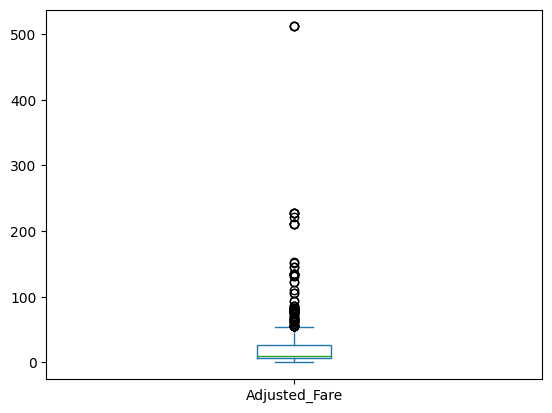

In [147]:
df['Adjusted_Fare'].plot(kind='box')

In [148]:
df['Adjusted_Fare'].describe()

count    891.000000
mean      23.087542
std       41.859760
min        0.000000
25%        7.000000
50%        9.000000
75%       26.000000
max      512.000000
Name: Adjusted_Fare, dtype: float64

<Axes: >

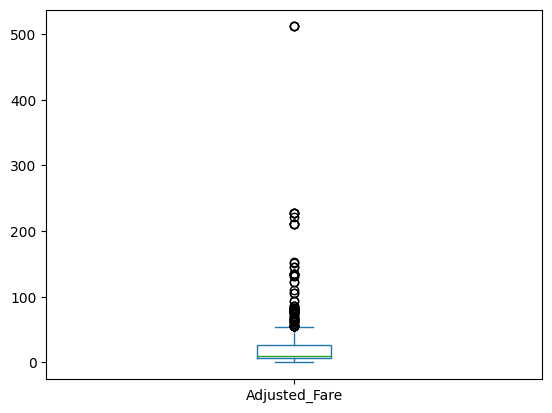

In [150]:
print(df['Adjusted_Fare'].describe())
df['Fare'].describe()

count    891.000000
mean      23.087542
std       41.859760
min        0.000000
25%        7.000000
50%        9.000000
75%       26.000000
max      512.000000
Name: Adjusted_Fare, dtype: float64


count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

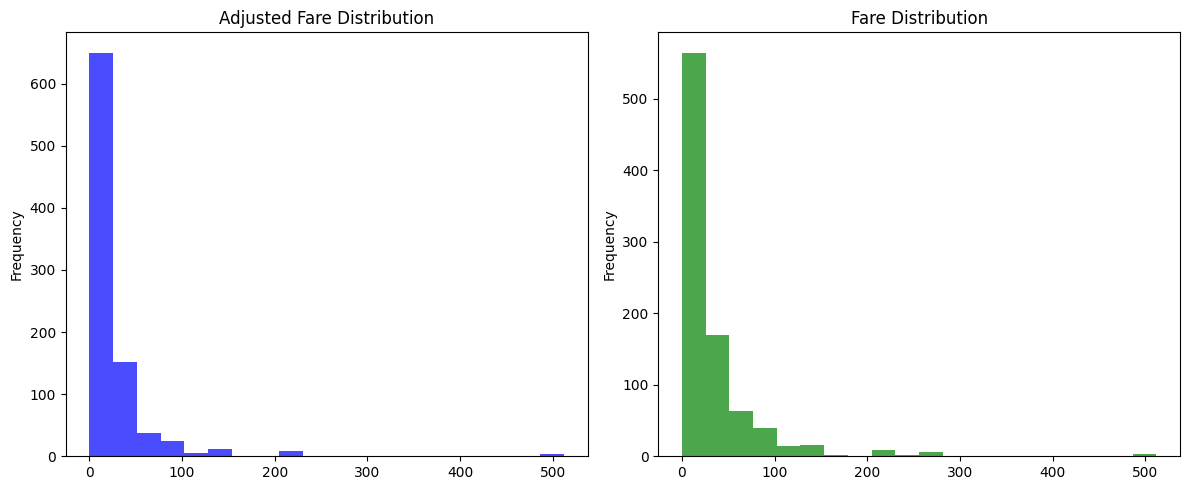

In [151]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for Adjusted_Fare
df['Adjusted_Fare'].plot(kind='hist', bins=20, alpha=0.7, ax=axes[0], color='blue', title='Adjusted Fare Distribution')

# Plot histogram for Fare
df['Fare'].plot(kind='hist', bins=20, alpha=0.7, ax=axes[1], color='green', title='Fare Distribution')

# Display the plots
plt.tight_layout()
plt.show()


<Axes: ylabel='Density'>

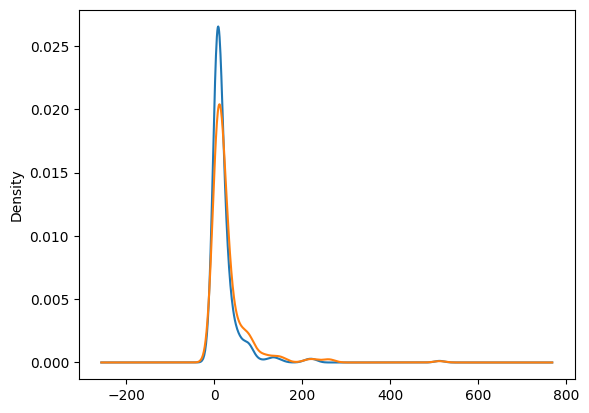

In [152]:
df['Adjusted_Fare'].plot(kind='kde')
df['Fare'].plot(kind='kde')

In [153]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_Category,Cabin_Letter,Family_name,Family_Size,Adjusted_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,Adult,Low,NaN,Braund,1,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,Adult,High,C,Cumings,1,71
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,Adult,Low,NaN,Heikkinen,1,7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,Adult,High,C,Futrelle,2,26
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,Adult,Low,NaN,Allen,1,8


In [156]:
df[df['Family_name']=='Futrelle']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_Category,Cabin_Letter,Family_name,Family_Size,Adjusted_Fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,Adult,High,C,Futrelle,2,26
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53,C123,S,Adult,High,C,Futrelle,2,26


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_Category,Cabin_Letter,Family_name,Family_Size,Adjusted_Fare
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Adult,Very High,C,Fortune,4.0,65.0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Adult,Very High,C,Fortune,4.0,65.0
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.0000,NaN,C,Adult,Very High,NaN,Ward,1.0,512.0
311,312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.0000,B57 B59 B63 B66,C,Teen,Very High,B,Ryerson,2.0,131.0
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Adult,Very High,C,Fortune,4.0,65.0
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Senior,Very High,C,Fortune,4.0,65.0
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.0000,B51 B53 B55,C,Adult,Very High,B,Cardeza,1.0,512.0
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.0000,B101,C,Adult,Very High,B,Lesurer,1.0,512.0
742,743,1.0,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.0000,B57 B59 B63 B66,C,Adult,Very High,B,Ryerson,2.0,131.0
915,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
df['size']=df.groupby(['Ticket', 'Family_name','Fare'])['Ticket'].transform('count')


In [169]:
def family(num):
    if num==1:
        return "alone"
    elif num==2:
        return "small"
    elif num>=3 and num<=4:
        return "large"
    else:
        return "Very Large"


In [170]:
df['Family_type']=df['Family_Size'].apply(family)

In [172]:
pd.crosstab(df['Family_type'],df['Survived'],normalize='index')*100

Survived,0,1
Family_type,,
Very Large,100.000000,0.000000
alone,65.937500,34.062500
large,45.714286,54.285714
small,40.277778,59.722222


In [173]:
df['Ticket_Prefix'] = df['Ticket'].astype(str).str.extract(r'([A-Za-z]+)', expand=False).fillna('No Prefix')
df['Ticket_Prefix'].value_counts()


Ticket_Prefix
No Prefix    661
PC            60
C             33
A             29
STON          18
SOTON         17
CA            14
S             14
SC            13
W             11
F              6
LINE           4
PP             3
P              2
WE             2
SO             1
Fa             1
SCO            1
SW             1
Name: count, dtype: int64

In [174]:
pd.crosstab(df['Ticket_Prefix'], df['Pclass'], normalize='index') * 100


Pclass,1,2,3
Ticket_Prefix,,,
A,0.000000,0.000000,100.000000
C,0.000000,60.606061,39.393939
CA,0.000000,0.000000,100.000000
F,16.666667,83.333333,0.000000
Fa,0.000000,0.000000,100.000000
LINE,0.000000,0.000000,100.000000
No Prefix,22.995461,19.213313,57.791225
P,0.000000,100.000000,0.000000
PC,100.000000,0.000000,0.000000


In [175]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()
df['Title'].replace(

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [176]:
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss',
    'Mme': 'Mrs', 'Countess': 'Mrs', 'Lady': 'Mrs',
    'Don': 'Mr', 'Sir': 'Mr', 'Jonkheer': 'Mr',
    'Dr': 'Dr', 'Rev': 'Rev',
    'Col': 'Officer', 'Major': 'Officer', 'Capt': 'Officer'
}

df['Title']=df['Title'].replace(title_mapping)

In [177]:
df['Title'].value_counts()

Title
Mr         520
Miss       185
Mrs        128
Master      40
Dr           7
Rev          6
Officer      5
Name: count, dtype: int64

In [179]:
pd.crosstab(df['Title'],df['Survived'],normalize='index')*100

Survived,0,1
Title,,
Dr,57.142857,42.857143
Master,42.500000,57.500000
Miss,29.729730,70.270270
Mr,84.230769,15.769231
Mrs,20.312500,79.687500
Officer,60.000000,40.000000
Rev,100.000000,0.000000
